In [1]:
import os,sys
from pathlib import Path
currentdir = Path(os.getcwd())
sys.path.insert(0, os.path.dirname(currentdir.parent))
sys.path.insert(0, os.path.dirname(currentdir))
print(str(sys.path))

['C:\\Users\\Roman\\Desktop\\GitBamt\\BAMT', 'C:\\Users\\Roman\\Desktop\\GitBamt', 'C:\\Users\\Roman\\Desktop\\GitBamt\\BAMT\\tutorials', 'C:\\ProgramData\\Anaconda3\\python38.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\Users\\Roman\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Roman\\.ipython']


In [2]:
import BAMT.Networks as Nets
import BAMT.Preprocessors as pp

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
hack = pd.read_csv(r'../Data/hack_processed_with_rf.csv')

In [4]:
hack.sample(5)

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/offshore,...,Period,Lithology,Gross,Netpay,Porosity,Permeability,Oil density,Oil recovery factor,Condensate recovery factor,Gas recovery factor
143,ELK BASIN,MADISON,USA,NORTH AMERICA,BIG HORN,COMPRESSION,44.9789,-108.8550,NUMEROUS,ONSHORE,...,CARBONIFEROUS,DOLOMITE,234.0,61.5,12.0,7.0,887.147335,0.38,NaN,NaN
374,ROMASHKINO,PASHIY (D-1 POOL),RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,55.3433,52.8447,TATNEFT,ONSHORE,...,DEVONIAN,SANDSTONE,34.5,8.7,19.0,375.0,806.267806,0.48,NaN,NaN
20,ANTRIM SHALE,ANTRIM SHALE (NORWOOD-LACHINE),USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,44.9540,-84.6603,NUMEROUS,ONSHORE,...,DEVONIAN,SHALE,30.0,24.0,4.0,10.0,NaN,NaN,NaN,NaN
12,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION,60.7833,1.7333,TOTAL,OFFSHORE,...,JURASSIC,SANDSTONE,265.8,103.2,17.0,500.0,829.912023,0.64,NaN,NaN
173,GIRASSOL,MALEMBO (B SAND SYSTEM),ANGOLA,AFRICA,CONGO,NaN,-7.6714,11.7025,TOTAL,OFFSHORE,...,PALEOGENE,SANDSTONE,237.0,90.0,NaN,4200.0,865.443425,0.47,NaN,NaN


In [5]:
hack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Field name                  514 non-null    object 
 1   Reservoir unit              514 non-null    object 
 2   Country                     514 non-null    object 
 3   Region                      514 non-null    object 
 4   Basin name                  514 non-null    object 
 5   Tectonic regime             442 non-null    object 
 6   Latitude                    514 non-null    float64
 7   Longitude                   514 non-null    float64
 8   Operator company            514 non-null    object 
 9   Onshore/offshore            514 non-null    object 
 10  Hydrocarbon type            514 non-null    object 
 11  Reservoir status            514 non-null    object 
 12  Structural setting          514 non-null    object 
 13  Depth                       514 non

In [6]:
cols = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
hack = hack[cols]

In [8]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(hack)

In [9]:
discretized_data.sample(5)

,Tectonic regime,Period,Lithology,Structural setting,Gross,Netpay,Porosity,Permeability,Depth
156,4,7,11,6,1,1,2,1,3
280,0,21,14,2,2,2,1,1,0
357,4,17,11,1,4,4,2,2,3
308,0,12,9,2,0,2,2,3,2
230,0,7,11,2,0,1,4,4,0


## Group1 algorithm

In [10]:
bn = Nets.HybridBN(has_logit=True, use_mixture=True)
d = p.info

In [11]:
bn.add_nodes(d)
bn.add_edges(discretized_data, scoring_function=('MI',))

In [12]:
bn.get_info()

,name,node_type,data_type,parents,parents_types
0,Tectonic regime,Discrete,disc,[],[]
1,Period,ConditionalLogit,disc,"[cont, disc, disc]","[Depth, Structural setting, Lithology]"
2,Lithology,ConditionalLogit,disc,"[cont, disc]","[Netpay, Structural setting]"
3,Structural setting,Logit,disc,[cont],[Permeability]
4,Gross,MixtureGaussian,cont,[cont],[Porosity]
5,Netpay,MixtureGaussian,cont,[cont],[Permeability]
6,Porosity,ConditionalMixtureGaussian,cont,[disc],[Tectonic regime]
7,Permeability,MixtureGaussian,cont,[cont],[Gross]
8,Depth,MixtureGaussian,cont,[cont],[Gross]


In [13]:
# bn.plot('Test1')

## Group1. Params

In [14]:
# print(bn.nodes)

In [15]:
params = {'init_nodes': ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross']}
bn.add_edges(discretized_data, scoring_function=('MI',), params=params)
bn.plot('Test2')

In [16]:
params = {'init_nodes': ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross'],
         'white_list': [('Period', 'Permeability'), ('Structural setting', 'Netpay'), ('Gross', 'Permeability')]}
bn.add_edges(discretized_data, scoring_function=('MI',), params=params)
bn.plot('Test2')

In [17]:
params = {'init_nodes': ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross'],
          'init_edges':[('Period', 'Permeability'), ('Structural setting', 'Netpay'), ('Gross', 'Permeability')],}
bn.add_edges(discretized_data, scoring_function=('MI',), params=params)
bn.plot('Test2')

In [18]:
params = {'init_nodes': ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross'],
          'init_edges':[('Period', 'Permeability'), ('Structural setting', 'Netpay'), ('Gross', 'Permeability')],
         'remove_init_edges':True}
bn.add_edges(discretized_data, scoring_function=('MI',), params=params)
bn.plot('Test2')

## Sampling

In [19]:
bn.sample(10)

2021-12-26 21:14:07,611 | ERROR    | Networks.py-sample-0174 | Parameter learning wasn't done. Call fit_parameters method


In [20]:
bn.fit_parameters(hack)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

In [21]:
bn_1 = Nets.HybridBN(has_logit=True, use_mixture=True)
d = p.info
bn_1.add_nodes(d)

In [22]:
bn_2 = Nets.HybridBN(has_logit=True, use_mixture=True)
d = p.info
bn_2.add_nodes(d)

In [23]:
from pgmpy.estimators import K2Score
bn_1.add_edges(discretized_data, scoring_function=('MI',))
bn_2.add_edges(discretized_data, scoring_function=('K2',K2Score))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [24]:
bn_1.fit_parameters(hack)
bn_2.fit_parameters(hack)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Po

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

In [25]:
predictions_mi = bn_1.sample(514, as_df=True)
predictions_k2 = bn_2.sample(514, as_df=True)

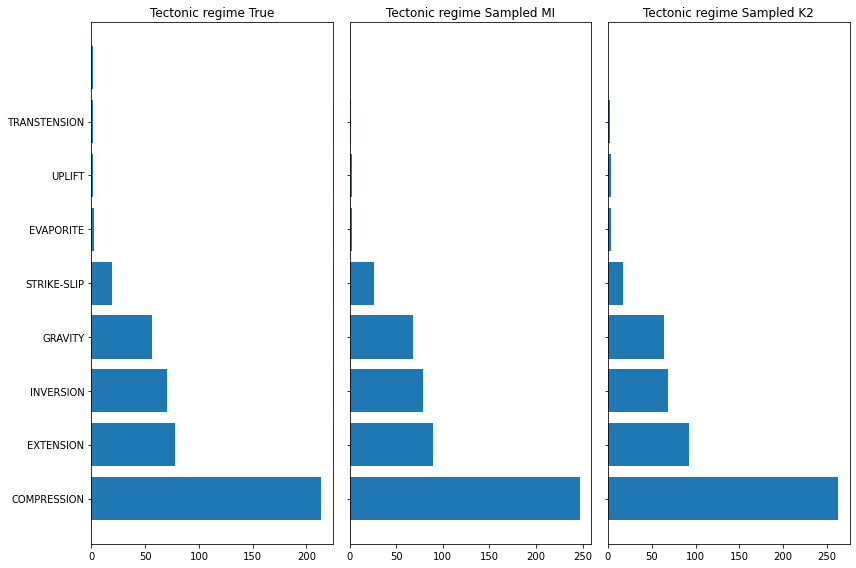

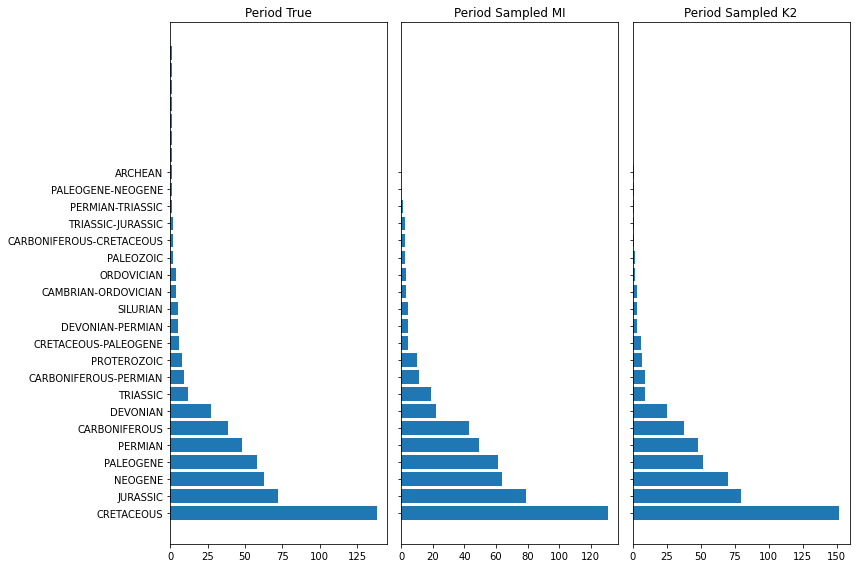

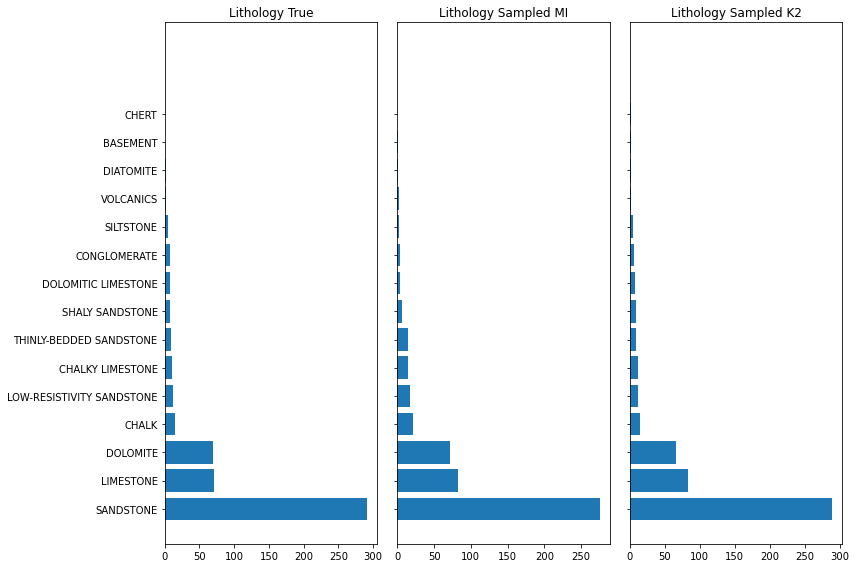

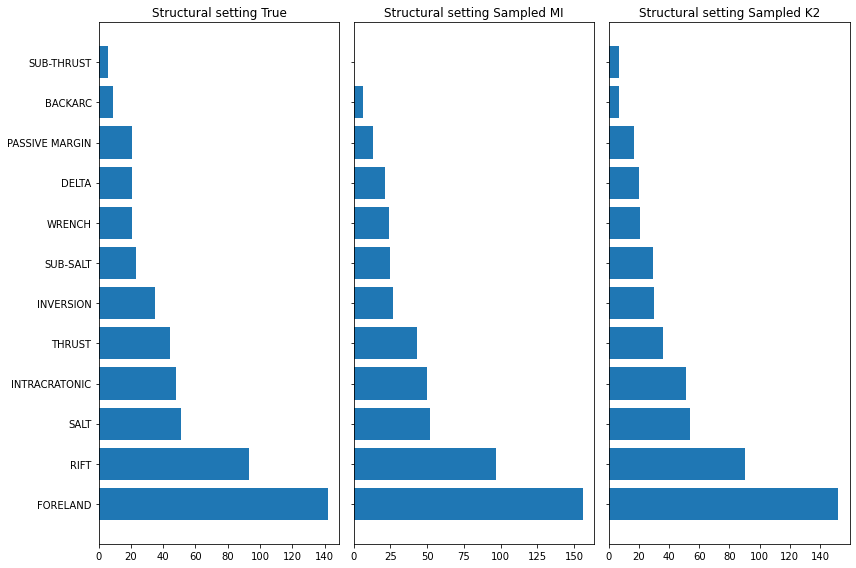

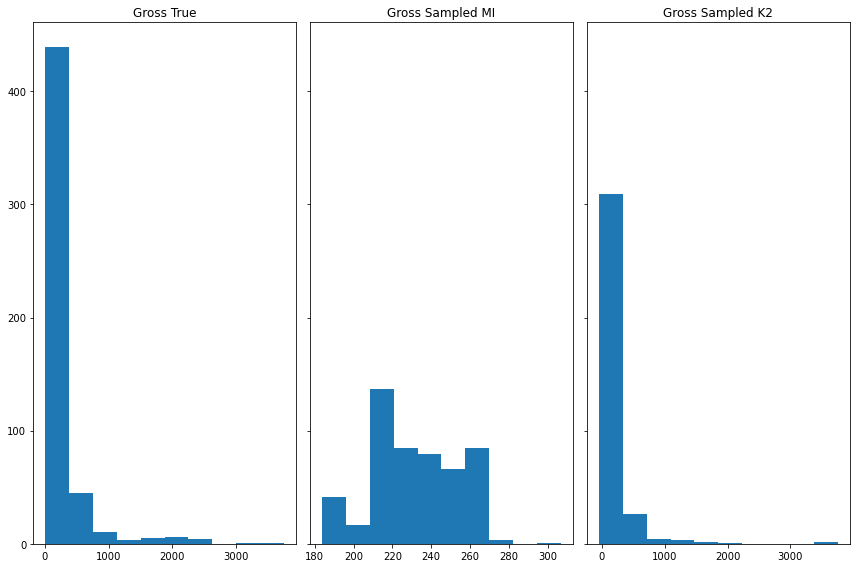

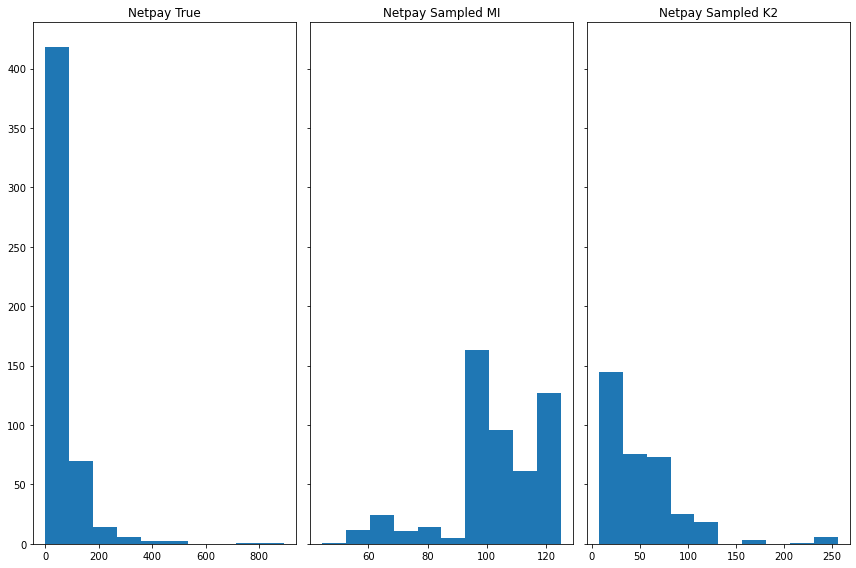

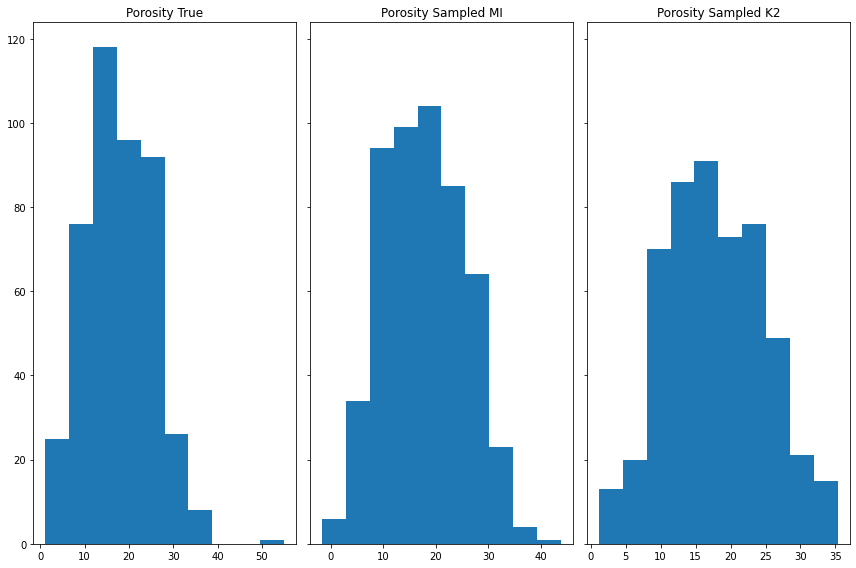

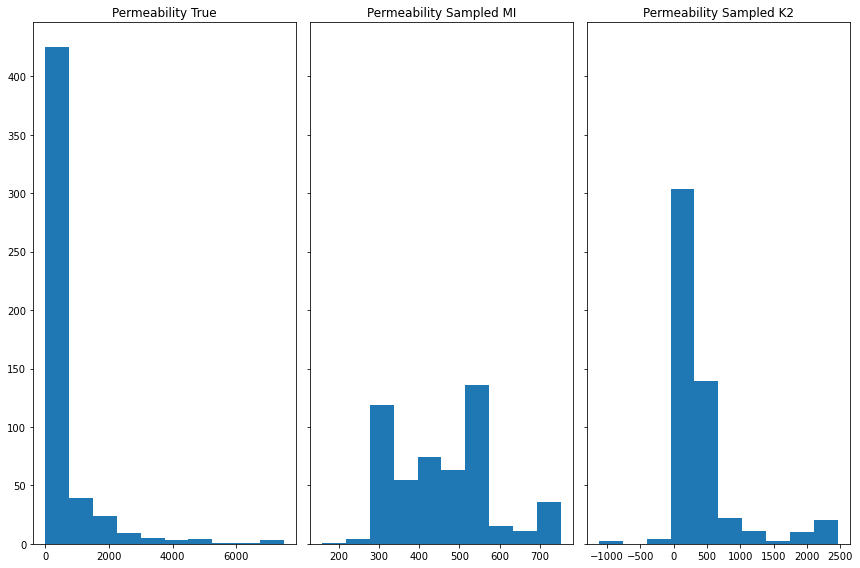

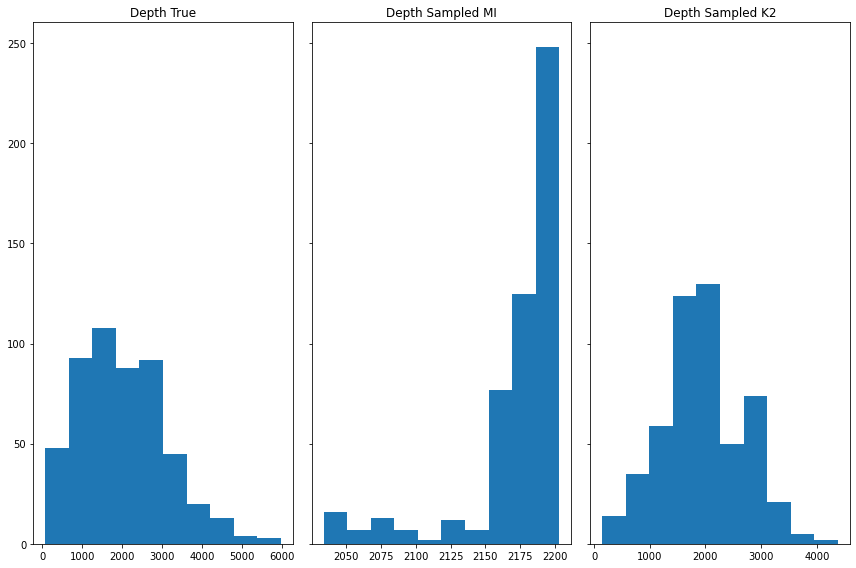

In [26]:
for column in hack.columns.to_list():
    fig, ax = plt.subplots(1,3, figsize=(12,8), sharey=True)
    if hack[column].dtype.name in ['float64']:
        ax[0].hist(hack[column].values)
        ax[1].hist(predictions_mi[column].values)
        ax[2].hist(predictions_k2[column].values)
    else:
        ax[0].barh(hack[column].value_counts().index, hack[column].value_counts().values)
        ax[1].barh(predictions_mi[column].value_counts().index, predictions_mi[column].value_counts().values)
        ax[2].barh(predictions_k2[column].value_counts().index, predictions_k2[column].value_counts().values)
    ax[0].set_title(f'{column} True')
    ax[1].set_title(f'{column} Sampled MI')
    ax[2].set_title(f"{column} Sampled K2")
    
    plt.tight_layout()